In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

# Non-Linear Modeling
Here, we're going to learn how to use both Decision Trees and Random Forests using a housing data dataset. Within this dataset, we're going to be using a majority of our given columns in order to predict `price`. However, to refresh some of your data preprocessing skills, I'm not going to preprocess any of the dataset for you and instead, I'm going to leave that up to you! 

Once we preprocess our model, we'll then train/predict using both of our non-linear methods and also with linear regression to see which model performs best for this specific dataset

### Preprocessing

In [2]:
from sklearn import tree
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
# Read in the dataset.
data = pd.read_csv("data/housing_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Drop the following columns: zipcode, yr_renovated, sqft_basement, condition, and grade
data = data.drop(["zipcode", "yr_renovated", "sqft_basement", "condition", "grade"], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
 14  sqft_living15  21613 non-null  int64  
 15  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(10), object(1)
memory usage: 2.6+ MB


In [7]:
# Are there any other columns that you should drop?
# id should be dropped, unsure about lat and long - should this be combined into a single feature?
data = data.drop(["id"], axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(9), object(1)
memory usage: 2.5+ MB


In [9]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# Preprocess the date column to be the following format: dd.mm.yyyy
# Ex: The date `20141013T000000` corresponds to `13.10.2014`

In [10]:
data['date'] = data['date'].str[:8]

In [11]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,1180,1955,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,2170,1951,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,770,1933,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,1050,1965,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,1680,1987,47.6168,-122.045,1800,7503


In [12]:
data['date'] = data['date'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.5 MB


In [14]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,1180,1955,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,2170,1951,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,770,1933,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,1050,1965,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,1680,1987,47.6168,-122.045,1800,7503


In [15]:
data["date"] = pd.to_datetime(data["date"], format = "%Y%m%d")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   sqft_above     21613 non-null  int64         
 10  yr_built       21613 non-null  int64         
 11  lat            21613 non-null  float64       
 12  long           21613 non-null  float64       
 13  sqft_living15  21613 non-null  int64         
 14  sqft_lot15     21613 non-null  int64         
dtypes: datetime64[ns](1

In [17]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,1180,1955,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,2170,1951,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,770,1933,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,1050,1965,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,1680,1987,47.6168,-122.045,1800,7503


In [19]:
# Check if there are any missing values. If so, delete these rows.
# i did this above

### Modeling

In [20]:
# Using price as the target variable, split your dataset into a 80/20 training/testing split with a random state of 42.
# Do not use date, lat or long within your training variables.

In [18]:
X = data.drop(["price", "date", "lat", "long"], axis=1)
y = data["price"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)

In [23]:
# Using a linear regression model, come up with predictions on the testing set.

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression R2 Score: 0.6077368086073374


In [26]:
# Using a decision tree, come up with predictions on the testing set.

In [22]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"Decision Tree r2 Score: {dt_r2}")

Decision Tree r2 Score: 0.44277799138160856


In [28]:
# Using a random forest, come up with predictions on the testing set.

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [24]:
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest r2 Score: {rf_r2}")

Random Forest r2 Score: 0.6714035774898155


In [25]:
# Along with the actuals, put the LR, DT, and RF model predictions in a single dataframe.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
predictions_dict = {"y_test": y_test, "y_pred_lr": y_pred_lr, "y_pred_dt": y_pred_dt, "y_pred_rf": y_pred_rf}
data_pred = pd.DataFrame.from_dict(predictions_dict)

In [26]:
data_pred.head()

,y_test,y_pred_lr,y_pred_dt,y_pred_rf
735,365000.0,5.119491e+05,335000.0,474579.08
2830,865000.0,6.673667e+05,419900.0,612045.00
4106,1038000.0,1.101715e+06,1175000.0,947120.76
16218,1490000.0,1.455409e+06,945000.0,1221511.00
19964,711000.0,6.291284e+05,337500.0,517057.17


In [33]:
# Using R^2 as a metric, which algorithm performed the best?
# linear regression!

In [34]:
# For the Random Forest model, use seaborn to print display the feature importance.
# Which is by far the most important feature?

In [27]:
rf.feature_importances_

array([0.01134952, 0.03256575, 0.56916979, 0.04897926, 0.00816963,
       0.02502841, 0.02999967, 0.04182088, 0.08540956, 0.08992605,
       0.05758147])

In [36]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [38]:
#feature_importances = pd.DataFrame(
#    rf.feature_importances_, 
#    index =X_train.columns,  
#    columns=['importance']
# ).sort_values('importance', ascending=False)

# alternative method in homework solutions
feat_importances = pd.DataFrame()
feat_importances["colname"] = X_train.columns
feat_importances["importance"] = rf.feature_importances_

In [40]:
# see plot in solutions
feat_importances.sort_values('importance', ascending=False)

,colname,importance
2,sqft_living,0.569170
9,sqft_living15,0.089926
8,yr_built,0.085410
10,sqft_lot15,0.057581
3,sqft_lot,0.048979
7,sqft_above,0.041821
1,bathrooms,0.032566
6,view,0.030000
5,waterfront,0.025028
0,bedrooms,0.011350


<Axes: xlabel='importance', ylabel='colname'>

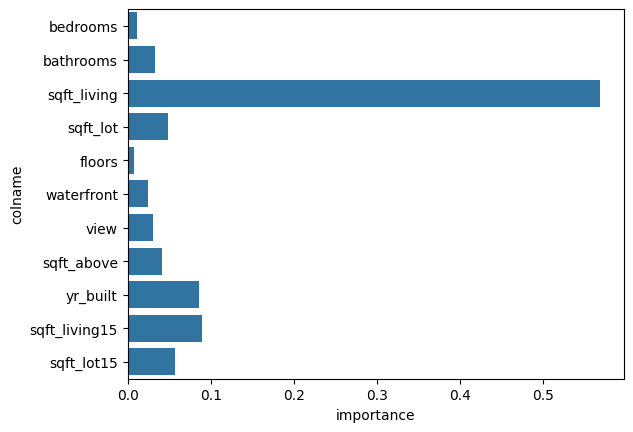

In [43]:
sns.barplot(
    data = feat_importances,
    y = "colname",
    x = "importance",
    orient = "h"
)

### Challenges

In [39]:
# Challenge: By trying different hyperparameters, can you improve upon the R^2 performance for this training/testing split?

In [51]:
#from tqdm.notebook import tqdm

n_estimators = list(range(1, 101, 50))
criterions = ["squared_error", "poisson"]

# Initialize the dataframe.
tuning_df = pd.DataFrame()
counter = 0

for n_estimator in n_estimators:
    for criterion in criterions:
        print(n_estimator, criterion)
        rf = RandomForestRegressor(
            n_estimators=n_estimator,
            criterion=criterion,
        )
        rf.fit(X_train, y_train)
        rf_preds = rf.predict(X_test)
        r2 = r2_score(y_test, rf_preds)
        tuning_df.loc[counter, "n_estimator"] = n_estimator
        tuning_df.loc[counter, "criterion"] = criterion
        tuning_df.loc[counter, "r2"] = r2

        counter += 1

1 squared_error
1 poisson
51 squared_error
51 poisson


In [52]:
tuning_df

,n_estimator,criterion,r2
0,1.0,squared_error,0.346085
1,1.0,poisson,0.343692
2,51.0,squared_error,0.669800
3,51.0,poisson,0.671479


In [40]:
# Challenge: Using a decision tree with a max_leaf_nodes of 3, plot the decision tree. Do you know how to interpret this?

In [30]:
from sklearn import tree
from matplotlib import pyplot as plt

In [31]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train,y_train)
y_pred_dt_2 = dt.predict(X_test)


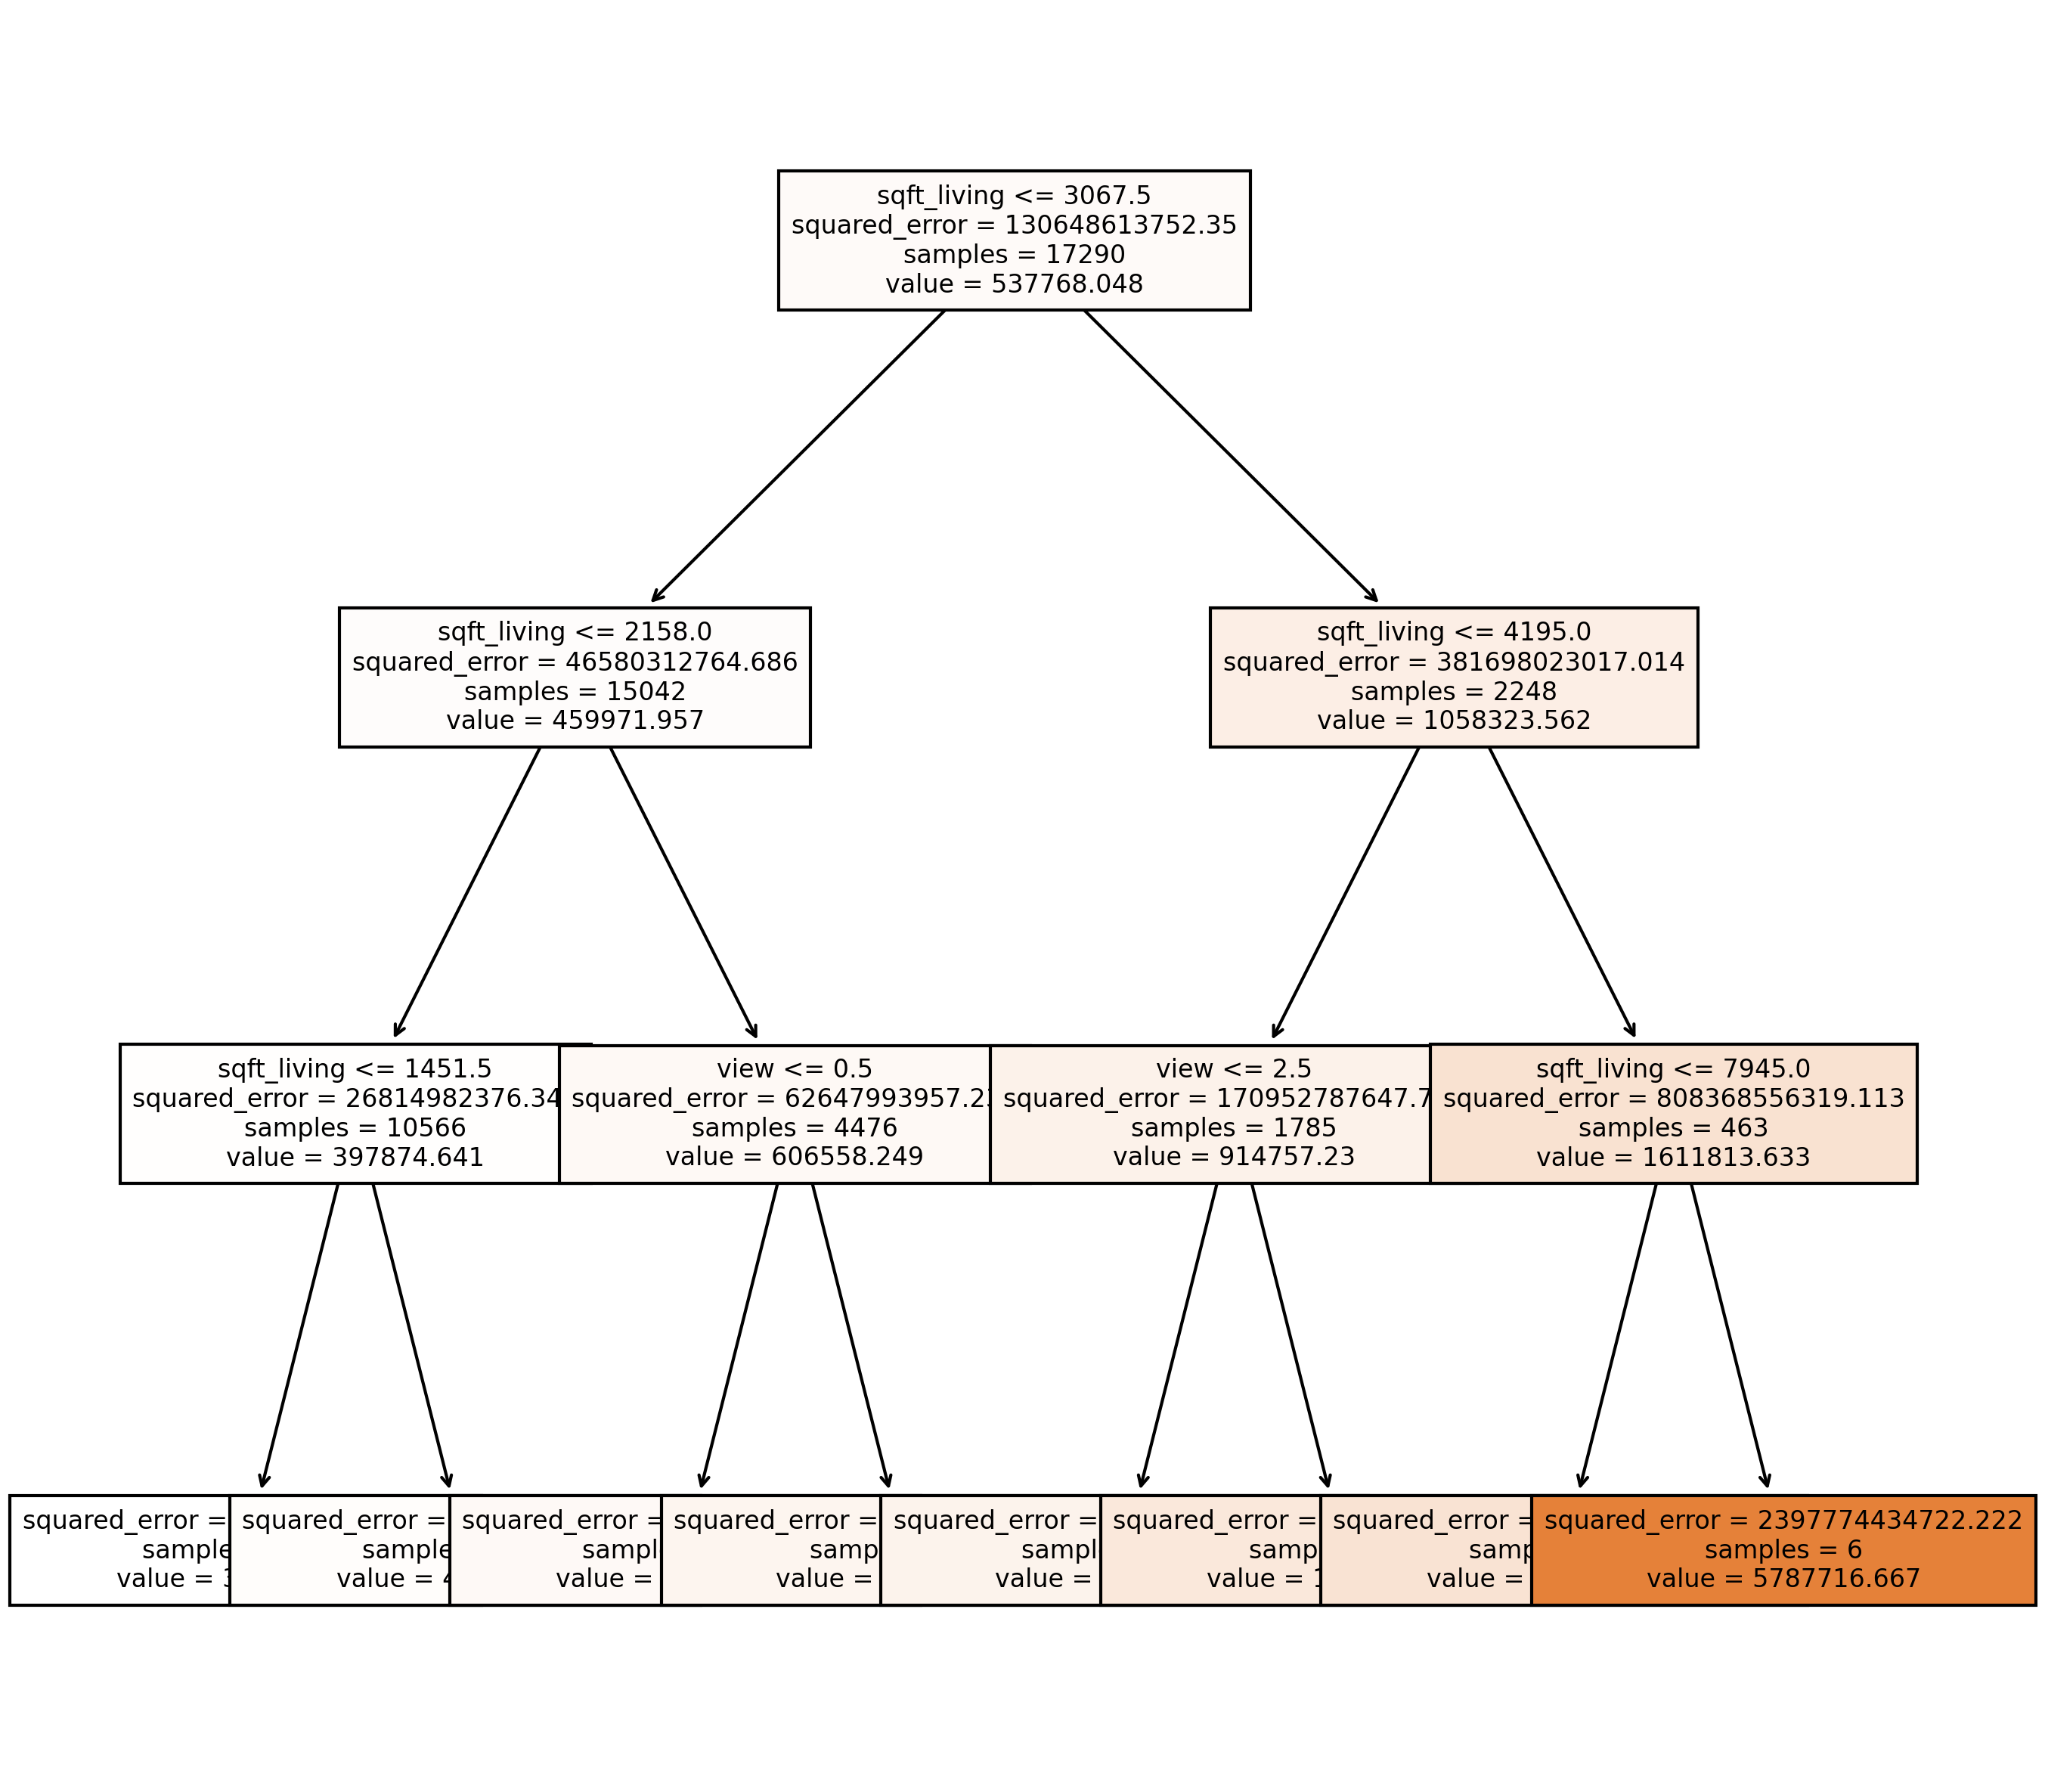

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(
    dt, 
    feature_names=X_train.columns, 
    filled=True,
    fontsize=8
)
plt.show()

In [44]:
# Challenge: The R^2 scores we found only correspond to this particular training and testing split.
# What is an appropriate way to obtain more general results for each of the 3 algorithms? 
# Once you think of the answer, do this for each of the algorithms and come up with the average answer.
# Now, does your current result match up with what we previously came up with?

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


num_folds = 5
random_seed = 42

kfold = KFold(
    n_splits=num_folds,
    random_state=random_seed,
    shuffle=True
)
print('Working on LR...')
lr = LinearRegression()
lr_cv_results = cross_val_score(
    lr, X, y, 
    cv=kfold,
    scoring="r2"
)
print('Working on DT...')
dt = DecisionTreeRegressor()
dt_cv_results = cross_val_score(
    dt, X, y, 
    cv=kfold,
    scoring="r2"
)

print('Working on RF...')
rf = RandomForestRegressor()
rf_cv_results = cross_val_score(
    rf, X, y, 
    cv=kfold,
    scoring="r2"
)

Working on LR...
Working on DT...
Working on RF...


In [54]:
print(f"LR 5-fold CV Results: {np.mean(lr_cv_results)}")
print(f"DT 5-fold CV Results: {np.mean(dt_cv_results)}")
print(f"RF 5-fold CV Results: {np.mean(rf_cv_results)}")

LR 5-fold CV Results: 0.6056743936648707
DT 5-fold CV Results: 0.44874920804472823
RF 5-fold CV Results: 0.715643617849504


# Let's do some math to "prove" that ensembles work!


Let's say that we have 5 different models with the following probabilities of being correct in a binary classification sense:
- Model 1: 0.63
- Model 2: 0.61
- Model 3: 0.65


If we were to use majority voting (i.e. if at least 2 of 3 predict one class, the final ensemble prediction will be that class), what's the probability that we get our prediction correct?

Hint: Calculate the probability of 0 being correct, the probability of 1 being correct, the probability of 2 being correct, and the probability of getting all correct. 